In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

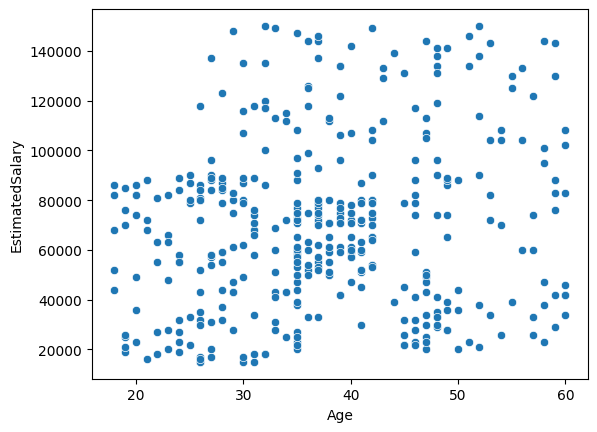

In [5]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

In [6]:
# Split the data into ind variable and dep variable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [9]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [11]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Building DNN/MLP

# Case 1 - MLP without Feature Scaling

In [18]:
from keras.layers import BatchNormalization
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 30ms/step - loss: 7988.1670 - accuracy: 0.3656 - val_loss: 5742.6924 - val_accuracy: 0.3250
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 2886.8403 - accuracy: 0.3656 - val_loss: 152.3639 - val_accuracy: 0.3250
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 995.8802 - accuracy: 0.6219 - val_loss: 1280.8574 - val_accuracy: 0.6750
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 683.3588 - accuracy: 0.5969 - val_loss: 606.7799 - val_accuracy: 0.3250
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 541.4828 - accuracy: 0.4031 - val_loss: 149.1174 - val_accuracy: 0.6750
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 225.9653 - accuracy: 0.5469 - val_loss: 329.6129 - val_accuracy: 0.3250
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 157.8026 - accuracy: 0.5156 - val_loss: 39.5652 - v

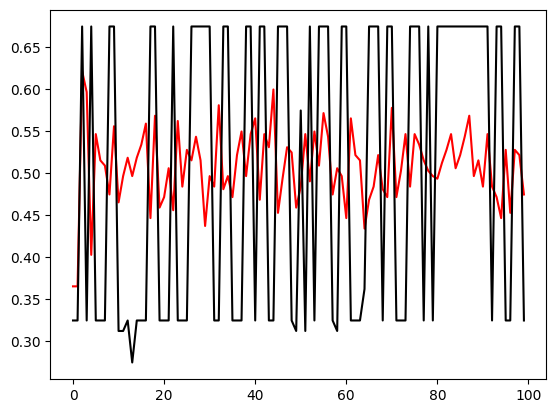

In [21]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='black')

# Case 2 : MLP with Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [23]:
from keras.layers import BatchNormalization
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=2))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               384       
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [24]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history1 = model1.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_test_scaled, y_test))

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.6176 - accuracy: 0.7531 - val_loss: 0.5820 - val_accuracy: 0.8000
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5676 - accuracy: 0.7906 - val_loss: 0.5333 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5240 - accuracy: 0.8219 - val_loss: 0.4918 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4890 - accuracy: 0.8344 - val_loss: 0.4554 - val_accuracy: 0.8250
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4580 - accuracy: 0.8438 - val_loss: 0.4250 - val_accuracy: 0.8375
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4310 - accuracy: 0.8500 - val_loss: 0.3992 - val_accuracy: 0.8375
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4099 - accuracy: 0.8469 - val_loss: 0.3764 - val_accuracy: 0.8375
Epoch 8/100


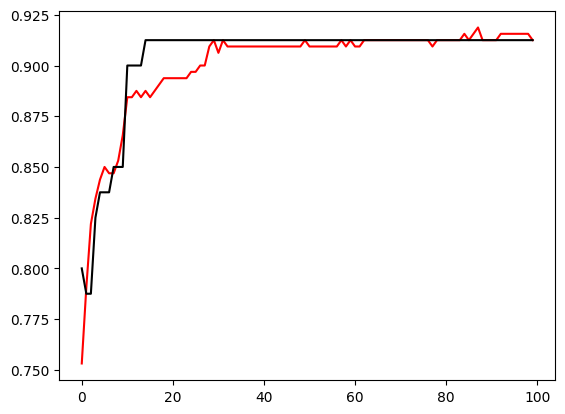

In [26]:
plt.plot(history1.history['accuracy'], color='red')
plt.plot(history1.history['val_accuracy'], color='black')